# Quantum Phase Estimation Algorithm

**By:** Arjun Bhamra

### Introducing the Quantum Phase Estimation Algorithm/Problem Statement

Quantum phase estimation is one of the most important subroutines in quantum computation. It serves as a central building block for many quantum algorithms. The objective of the algorithm is the following:

Given a unitary operator $U$, the algorithm estimates $\theta$ in $U|\psi\rangle=e^{2\pi i\theta}|\psi\rangle$. Here $|\psi\rangle$ is an eigenvector and $e^{2\pi i\theta}$ is the corresponding eigenvalue. Since $U$ is unitary, all of its eigenvalues have a norm of $1$.

### Imports

In [1]:
import qiskit as q
from qiskit import *
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit.extensions import UnitaryGate
from qiskit.extensions import Snapshot

In [2]:
IBMQ.load_account()
from qiskit.providers.ibmq import least_busy

/opt/anaconda3/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


### Creating the Algorithm

[[0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 1 0 0]]


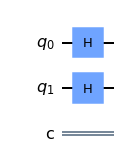

In [27]:
n = 1 #number of control qubits qubits

#creating the circuit
qr = q.QuantumRegister(n+1, 'q')
cr = q.ClassicalRegister(n, 'c')
qc = q.QuantumCircuit(qr, cr)

#preparing the hadamard transform
qc.h(qr[:n])

#preparing the eigenstate for X gate on last qubit on last qubit
qc.h(n)

#creating the controlled U gates for a given unitary matrix U
#here, we will be using the X gate (as mentioned above), which has eigenstates |+> and |->

X = np.array([[0, 1], [1, 0]])
I = np.array(([1, 0], [0, 1]))

CU = np.kron(X, I)
print(CU)

qc.draw('mpl')